In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [225]:
df= pd.read_csv("tips.csv")
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['day'] = label_encoder.fit_transform(df['day'])
df['time'] = label_encoder.fit_transform(df['time'])

In [226]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [227]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.741803,0.278689,2.569672
std,8.902412,1.383638,0.479967,0.486667,0.926815,0.449276,0.951100
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int32  
 3   smoker      244 non-null    int32  
 4   day         244 non-null    int32  
 5   time        244 non-null    int32  
 6   size        244 non-null    int64  
dtypes: float64(2), int32(4), int64(1)
memory usage: 9.7 KB


<Axes: xlabel='total_bill', ylabel='tip'>

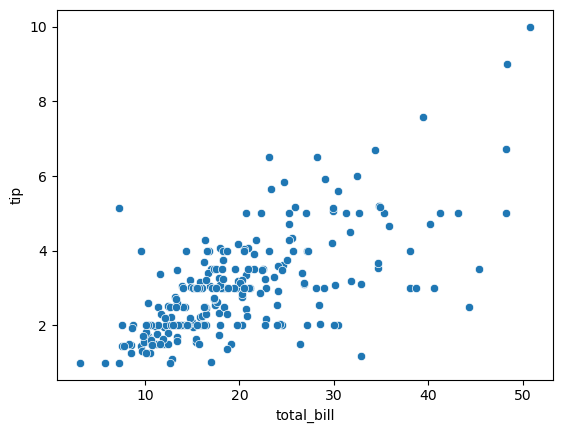

In [229]:
sns.scatterplot(x=df["total_bill"], y=df["tip"])

<Axes: xlabel='sex', ylabel='tip'>

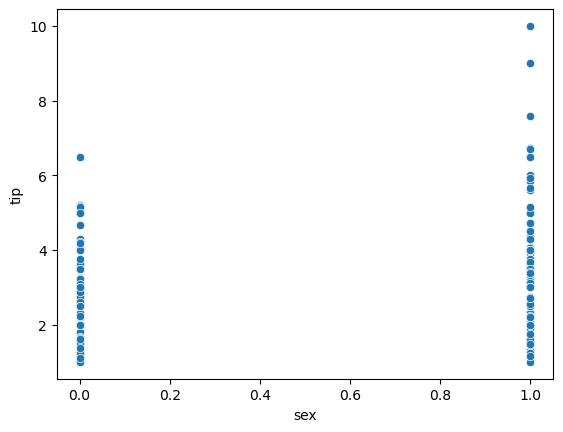

In [231]:
sns.scatterplot(x=df["sex"], y=df["tip"])

<Axes: xlabel='smoker', ylabel='tip'>

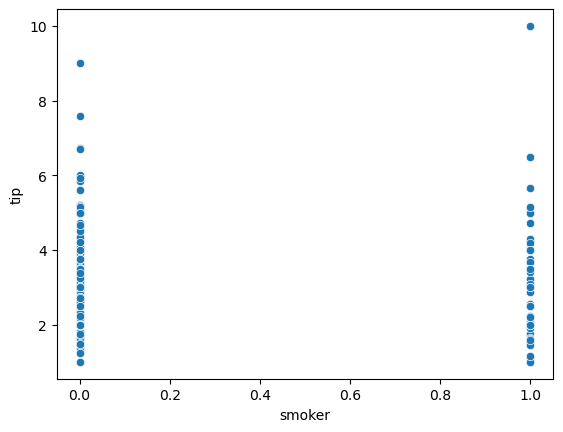

In [232]:
sns.scatterplot(x=df["smoker"],y='tip',data=df)

<Axes: xlabel='day', ylabel='tip'>

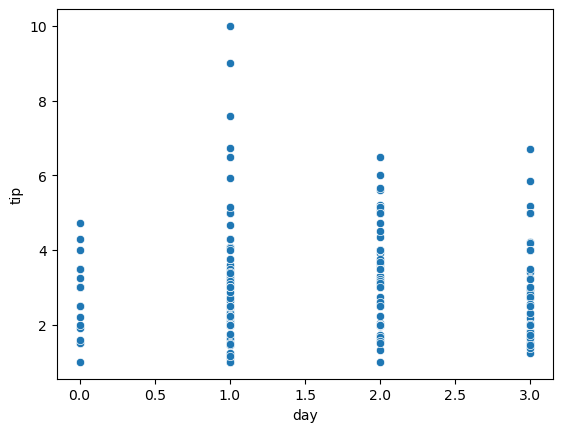

In [233]:
sns.scatterplot(x=df['day'], y=df['tip'])

<Axes: xlabel='time', ylabel='tip'>

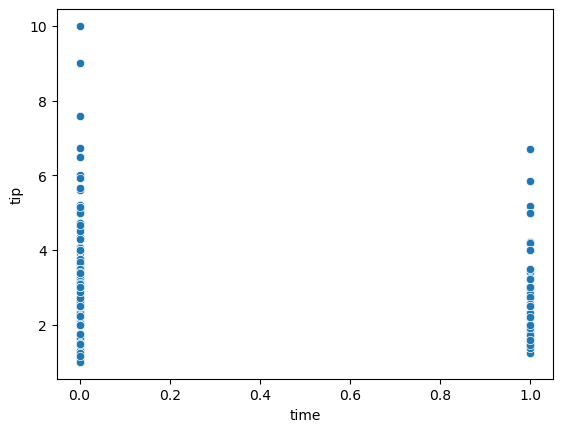

In [234]:
sns.scatterplot(x='time',y='tip',data=df)

<Axes: xlabel='size', ylabel='tip'>

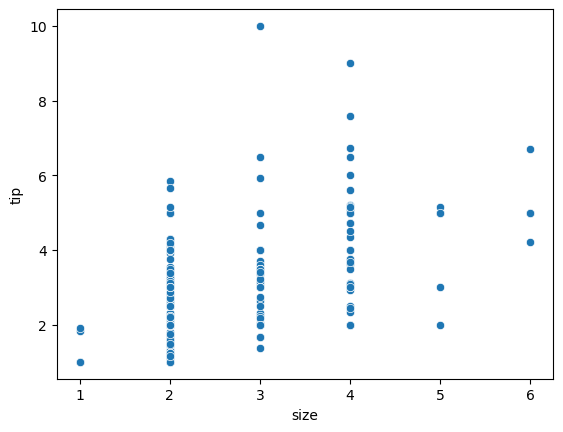

In [235]:
sns.scatterplot(x='size',y='tip',data=df)

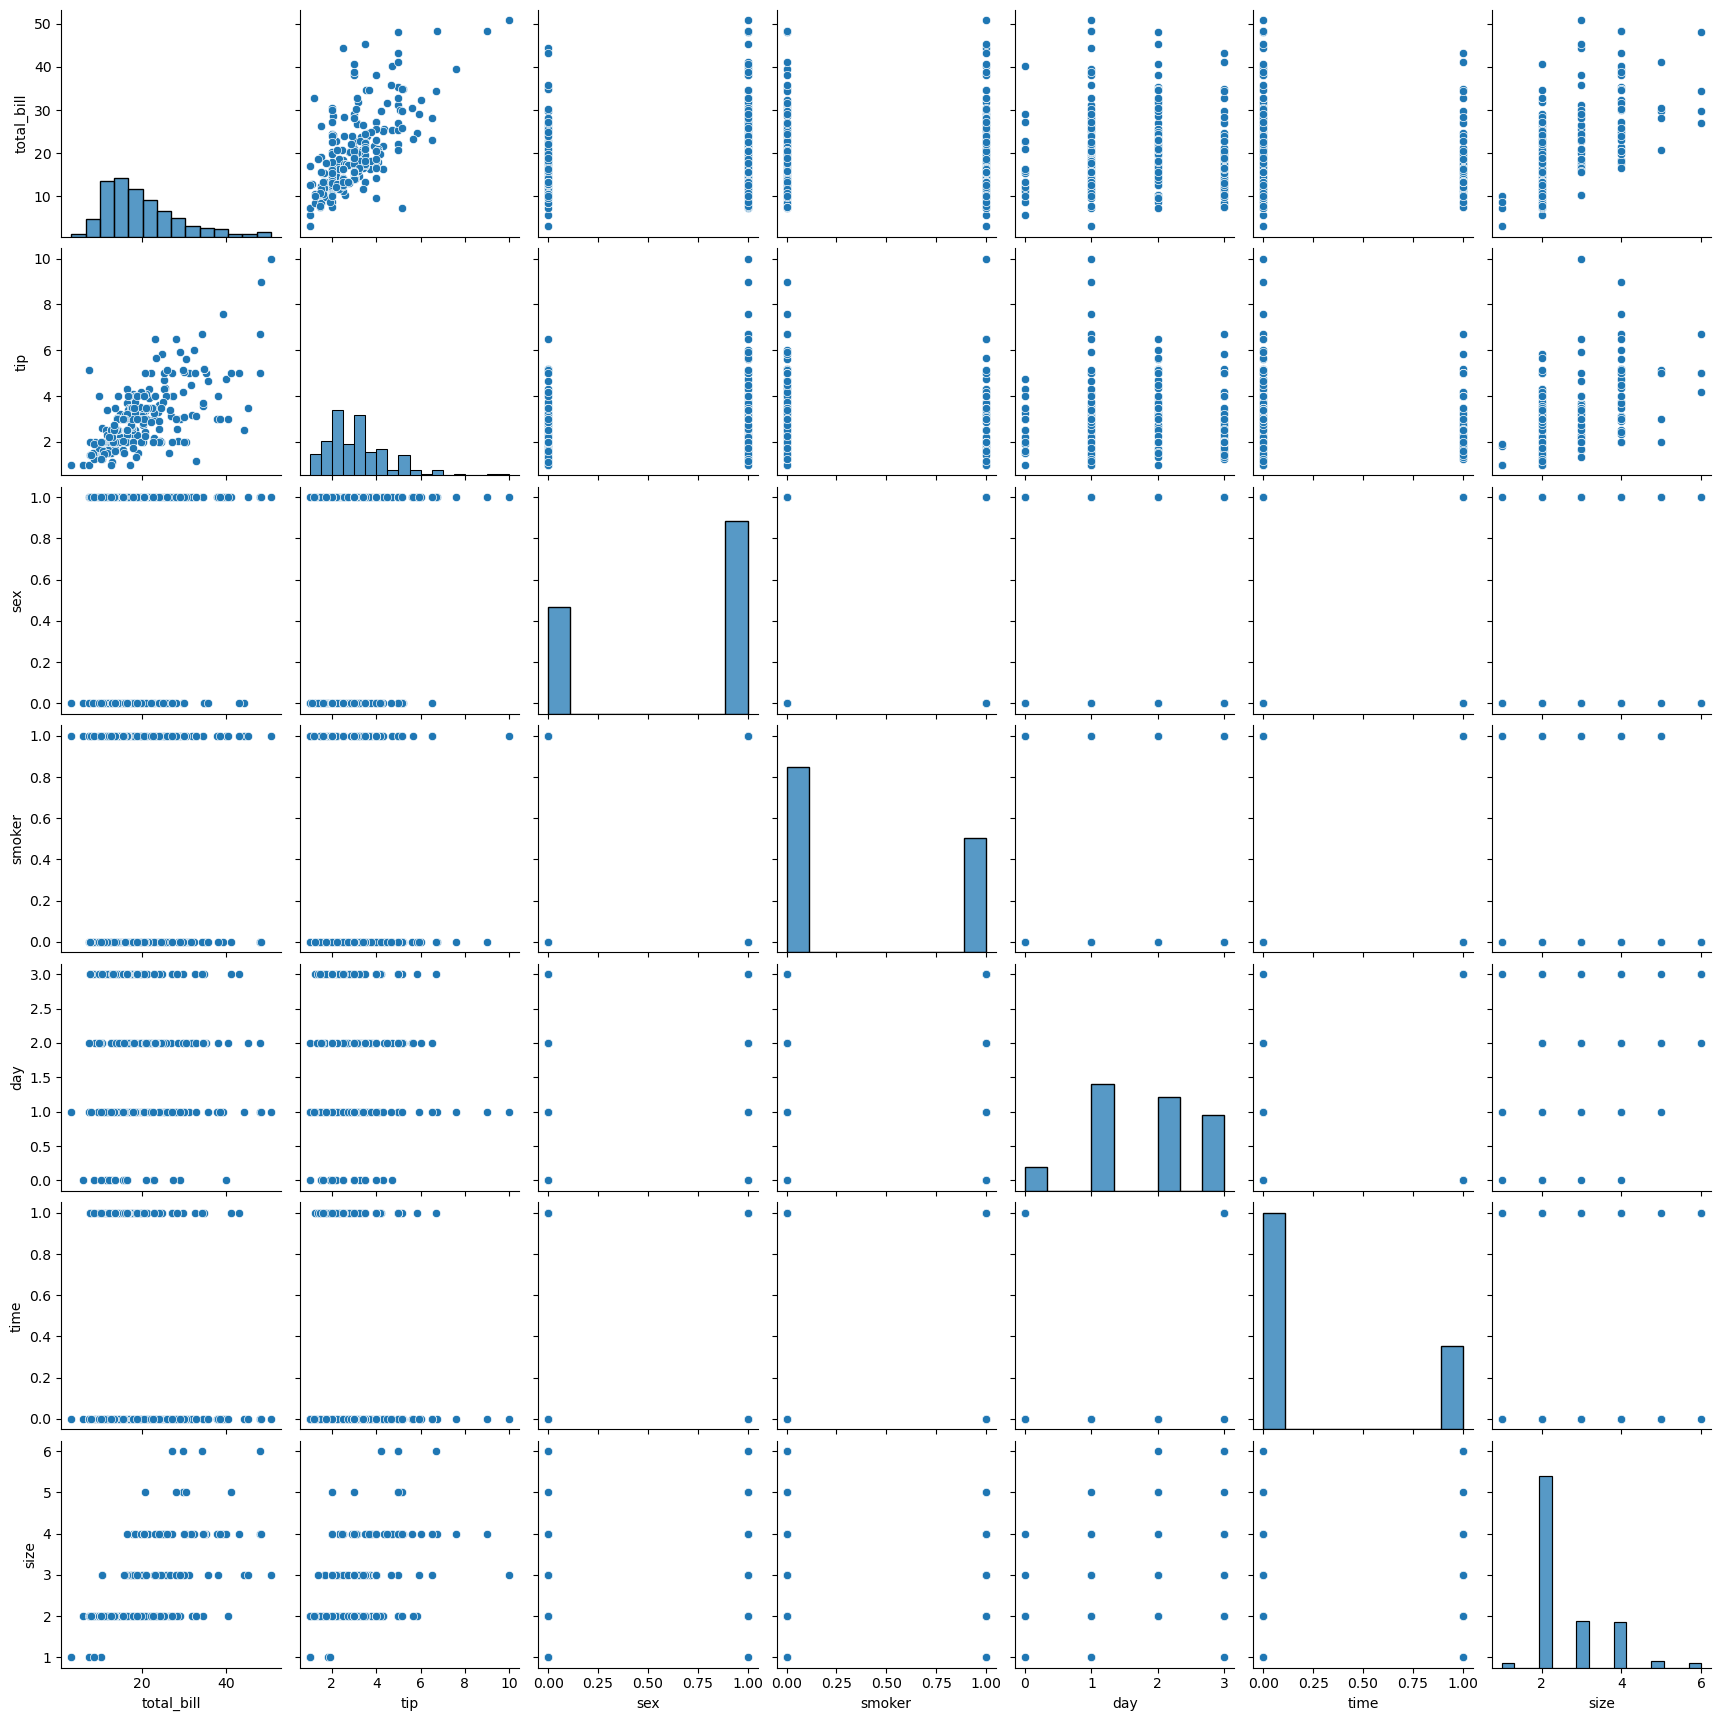

In [236]:
sns.pairplot(data=df)

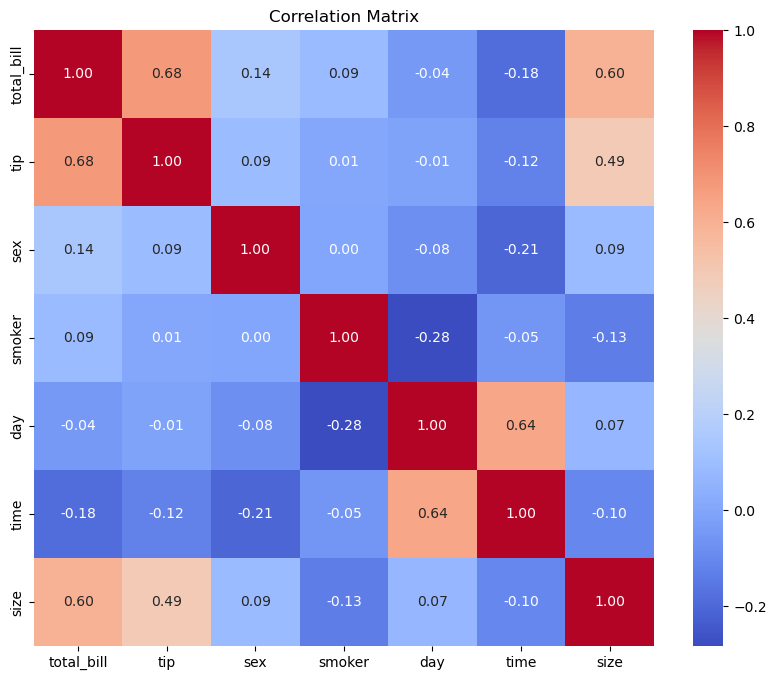

In [237]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# LINEAR REGRESSION

Now we will try to make a linear regression model between the two float type columns and try to predict the values using the model.We will be using the columns total bill and tip given.


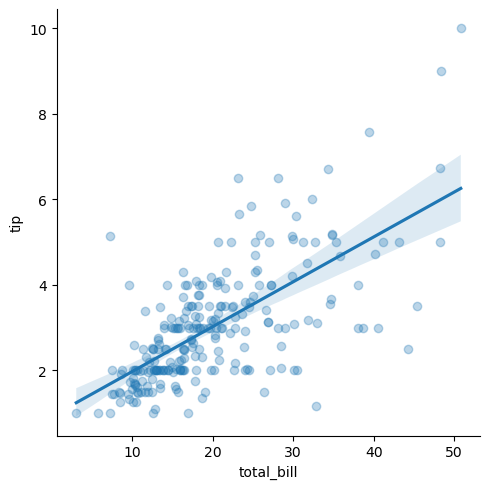

In [238]:
sns.lmplot(x='total_bill', 
           y='tip', 
           data=df,
           scatter_kws={'alpha':0.3})

In [245]:
X=X = df.drop('tip', axis=1).values
y=df['tip']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [246]:
print('Linear Regression R2:', r2_score(y_test, y_pred_linear))

Linear Regression R2: 0.4291782688312412


In [247]:
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_linear))
print('Mean Squared Error:',mean_squared_error(y_test, y_pred_linear))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, y_pred_linear)))

Mean Absolute Error: 0.6556759516313612
Mean Squared Error: 0.7524510349809156
Root Mean Squared Error: 0.86743935521794


# Model Training using other methods

In [248]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf'),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

# Function to evaluate models
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Performance:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print("-" * 30)
    return mse, mae, r2, y_pred

# Function to plot residuals
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

Evaluating Linear Regression...

Linear Regression Performance:
Mean Squared Error: 0.93
Mean Absolute Error: 0.72
R^2 Score: 0.29
------------------------------


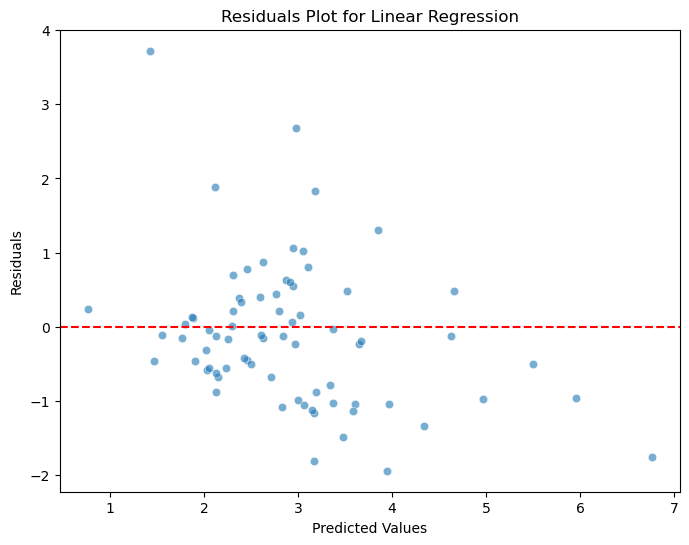

Evaluating Ridge Regression...

Ridge Regression Performance:
Mean Squared Error: 0.93
Mean Absolute Error: 0.72
R^2 Score: 0.30
------------------------------


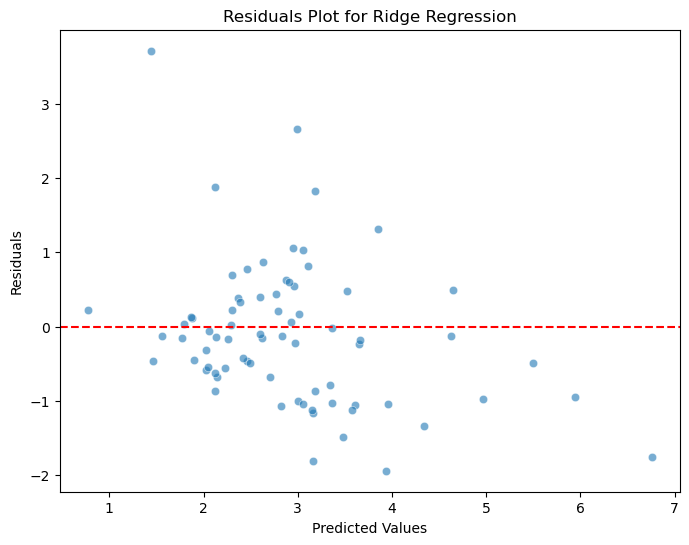

Evaluating Lasso Regression...

Lasso Regression Performance:
Mean Squared Error: 0.89
Mean Absolute Error: 0.70
R^2 Score: 0.32
------------------------------


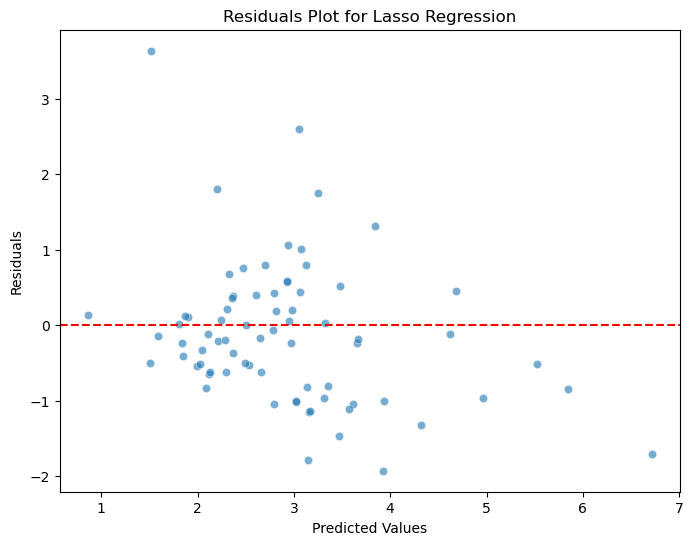

Evaluating Decision Tree...

Decision Tree Performance:
Mean Squared Error: 1.46
Mean Absolute Error: 0.94
R^2 Score: -0.11
------------------------------


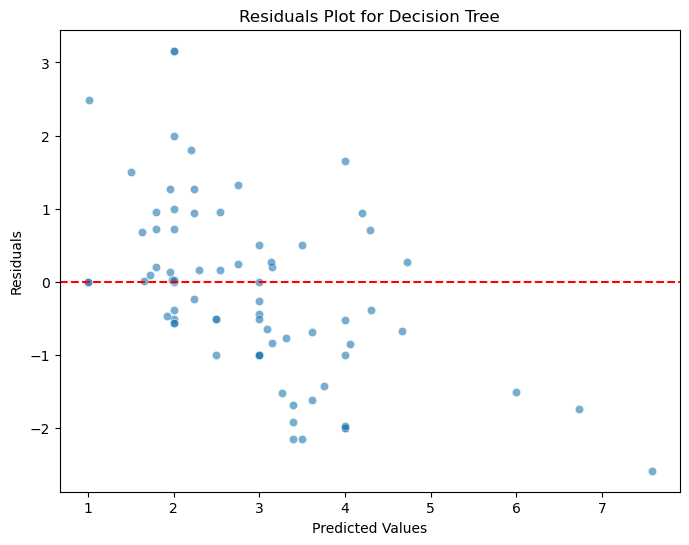

Evaluating Random Forest...

Random Forest Performance:
Mean Squared Error: 1.01
Mean Absolute Error: 0.79
R^2 Score: 0.23
------------------------------


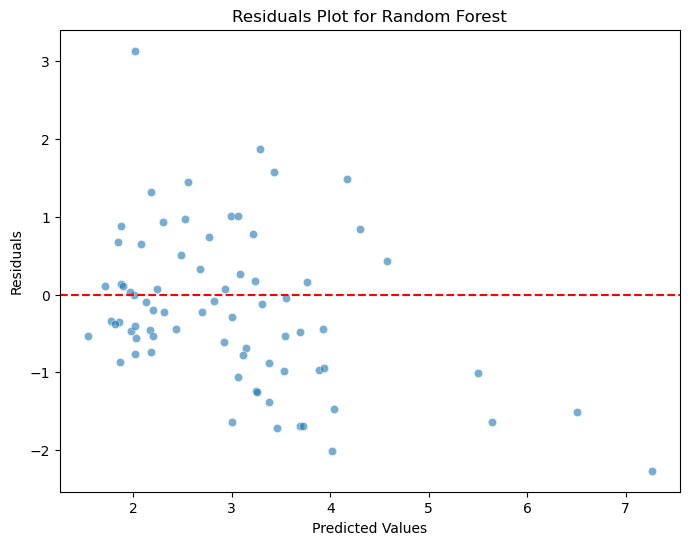

Evaluating SVR...

SVR Performance:
Mean Squared Error: 0.74
Mean Absolute Error: 0.63
R^2 Score: 0.44
------------------------------


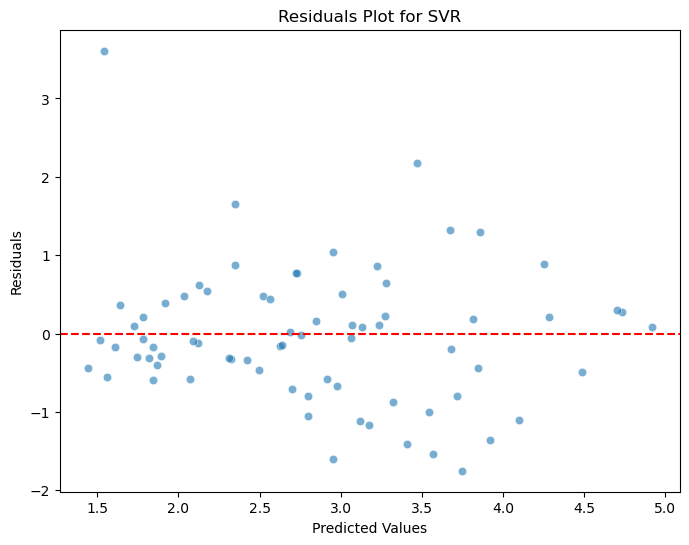

Evaluating KNN...

KNN Performance:
Mean Squared Error: 0.97
Mean Absolute Error: 0.77
R^2 Score: 0.27
------------------------------


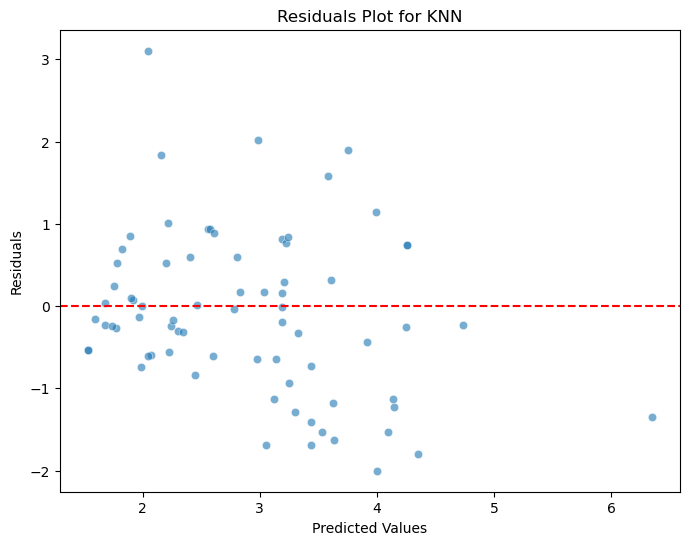

In [266]:
results = {}
# Loop through all models, evaluate, and plot residuals
for name, model in models.items():
    print(f"Evaluating {name}...\n")
    
    # Evaluate model and get predictions
    mse, mae, r2, y_pred = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    
    # Plot residuals for each model
    plot_residuals(y_test, y_pred, name)
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

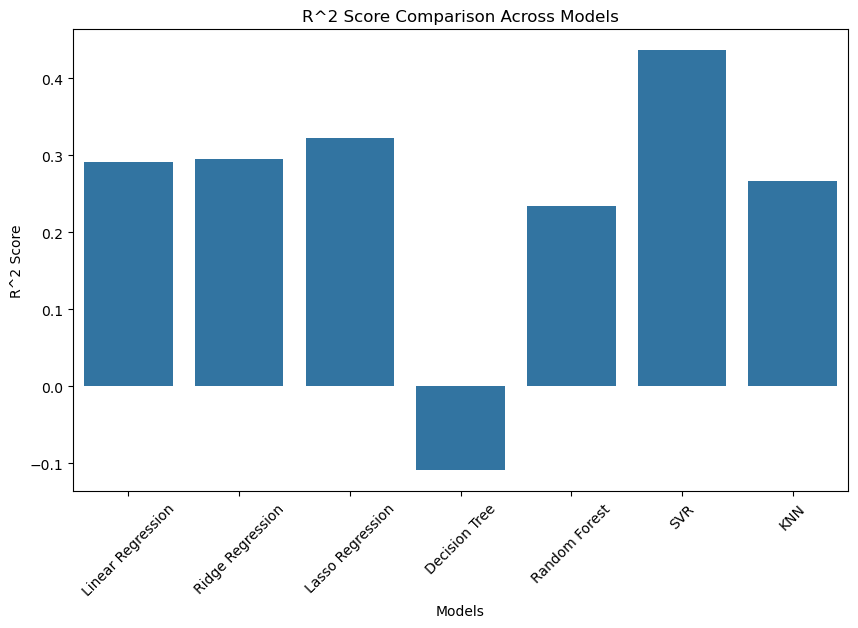

In [251]:
model_names = list(results.keys())
r2_scores = [results[name]['R2'] for name in model_names]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=r2_scores)
plt.title("R^2 Score Comparison Across Models")
plt.xlabel("Models")
plt.ylabel("R^2 Score")
plt.xticks(rotation=45)
plt.show()

We notice how the SVR model performs better than the other models for this given dataset in terms of R2 socres.

<Axes: xlabel='total_bill', ylabel='tip'>

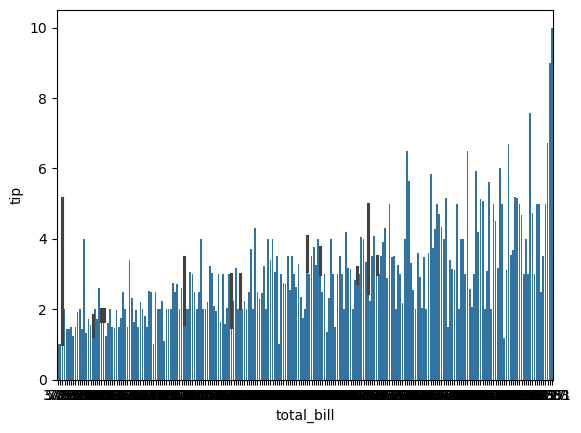

In [257]:
sns.barplot(x=df["total_bill"], y=df["tip"])

<Axes: xlabel='sex', ylabel='tip'>

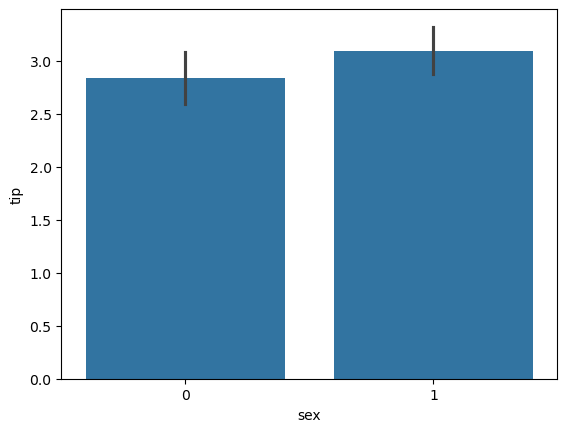

In [259]:
sns.barplot(x=df["sex"], y=df["tip"])

<Axes: xlabel='day', ylabel='tip'>

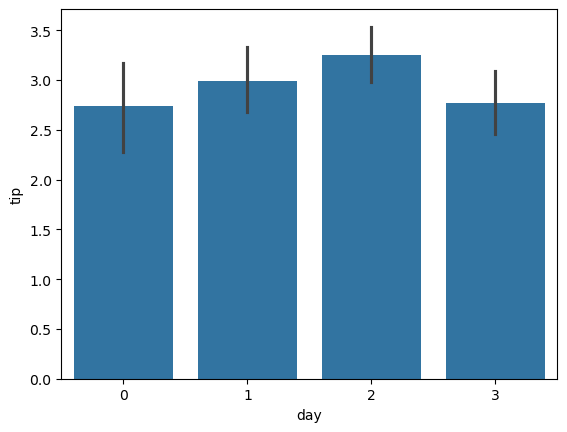

In [260]:
sns.barplot(x=df["day"], y=df["tip"])

<Axes: xlabel='time', ylabel='tip'>

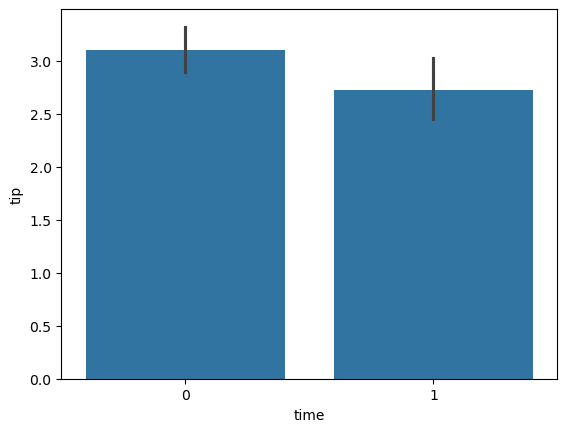

In [262]:
sns.barplot(x=df["time"], y=df["tip"])

<Axes: xlabel='smoker', ylabel='tip'>

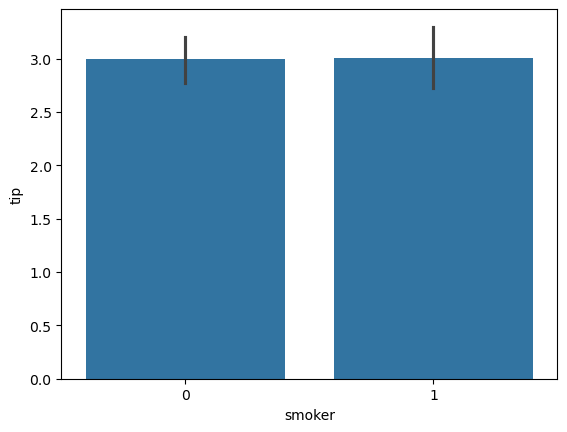

In [263]:
sns.barplot(x=df["smoker"], y=df["tip"])

<Axes: xlabel='size', ylabel='tip'>

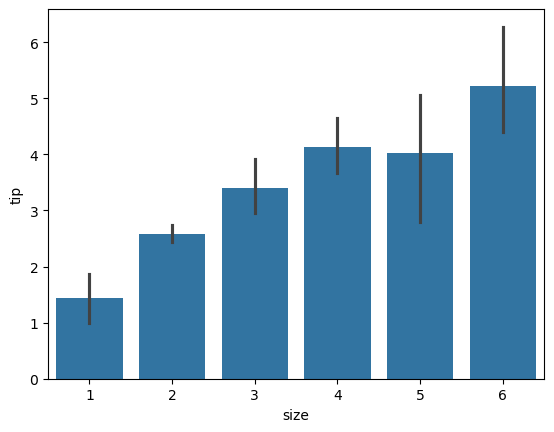

In [264]:
sns.barplot(x=df["size"], y=df["tip"])

# Insights for Management

## Higher Bills

People who have a higher bill tend to pay more tip, hence the management should try to convince the customers to try the restaurants premium orders and try to modify the menu as required

## Tips on Weekends

People tend to give less tips on weekends, this might be due to the high volume of customers on weekends than weekdays hence ensure you have enough staff to handle the increased volume of customers without sacrificing service quality.

## Lunch-Hour

More people tip away during lunch, so try to incentivise efficient lunch options which can attract customers and overall increase the tipping rates 

## Smokers 

The people whosmoke tip less than the non-smokers, hence we can try to improve the smokers tip by adding privilage such as smoking areas for the smokers which is away from the non-smoking area to retain the good environment in the restaurant.

## Bigger groups means bigger tips

Offer discounts,for large groups, or provide complimentary appetizers or drinks for groups of 3 or more as larger groups tend to leave a higher tip than smaller groups.
